In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

C:\Users\LOAR\AppData\Local\Temp\ipykernel_21000\972855212.py:4: UserWarning: Parsing '15-01-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\LOAR\AppData\Local\Temp\ipykernel_21000\972855212.py:4: UserWarning: Parsing '16-01-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\LOAR\AppData\Local\Temp\ipykernel_21000\972855212.py:4: UserWarning: Parsing '17-01-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\LOAR\AppData\Local\Temp\ipykernel_21000\972855212.py:4: UserWarning: Parsing '18-01-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\LOAR\AppData\Local\Temp\ipykernel_21000

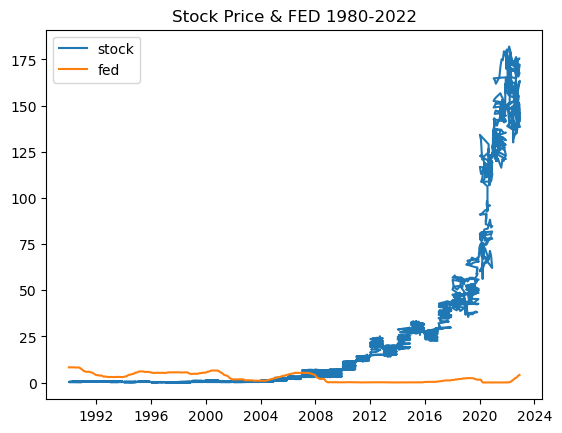

In [26]:
df=pd.read_csv('./dataset/apple1990~2022.csv')
fed=pd.read_csv('./dataset/fedfunds1990~2022.csv')

df['Date']=pd.to_datetime(df['Date'])
fed['Date']=pd.to_datetime(fed['DATE'])

plt.title('Stock Price & FED 1980-2022')
plt.plot(df['Date'], df['Close'],label="stock")
plt.plot(fed['Date'],fed['FEDFUNDS'],label="fed")

plt.legend()
plt.show()

In [30]:
df

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,1990-02-01,0.312500,0.314732,183198400,0.334821,0.332589,0.264886
1,1990-03-01,0.334821,0.339286,207995200,0.339286,0.334821,0.266663
2,1990-04-01,0.332589,0.341518,221513600,0.345982,0.335938,0.267553
3,1990-05-01,0.330357,0.337054,123312000,0.341518,0.337054,0.268442
4,1990-08-01,0.330357,0.334821,101572800,0.339286,0.339286,0.270220
...,...,...,...,...,...,...,...
8290,2022-11-25,147.119995,148.309998,35195900,148.880005,148.110001,148.110001
8291,2022-11-28,143.380005,145.139999,69246000,146.639999,144.220001,144.220001
8292,2022-11-29,140.350006,144.289993,83763800,144.809998,141.169998,141.169998
8293,2022-11-30,140.550003,141.399994,111224400,148.720001,148.029999,148.029999


C:\Users\LOAR\AppData\Local\Temp\ipykernel_21000\3514603238.py:4: UserWarning: Parsing '14-01-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\LOAR\AppData\Local\Temp\ipykernel_21000\3514603238.py:4: UserWarning: Parsing '15-01-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\LOAR\AppData\Local\Temp\ipykernel_21000\3514603238.py:4: UserWarning: Parsing '16-01-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\LOAR\AppData\Local\Temp\ipykernel_21000\3514603238.py:4: UserWarning: Parsing '17-01-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\LOAR\AppData\Local\Temp\ipykernel_2

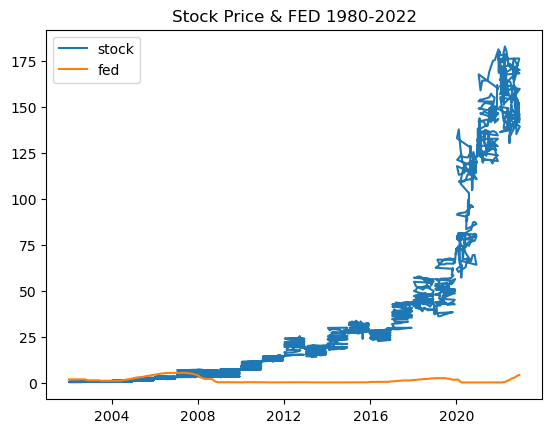

In [25]:
df=pd.read_csv('./apple2002.csv')
fed=pd.read_csv('./fedfunds2002.csv')

df['Date']=pd.to_datetime(df['Date'])
fed['Date']=pd.to_datetime(fed['DATE'])

plt.title('Stock Price & FED 1980-2022')
plt.plot(df['Date'], df['Open'],label="stock")
plt.plot(fed['Date'],fed['FEDFUNDS'],label="fed")

plt.legend()
plt.show()

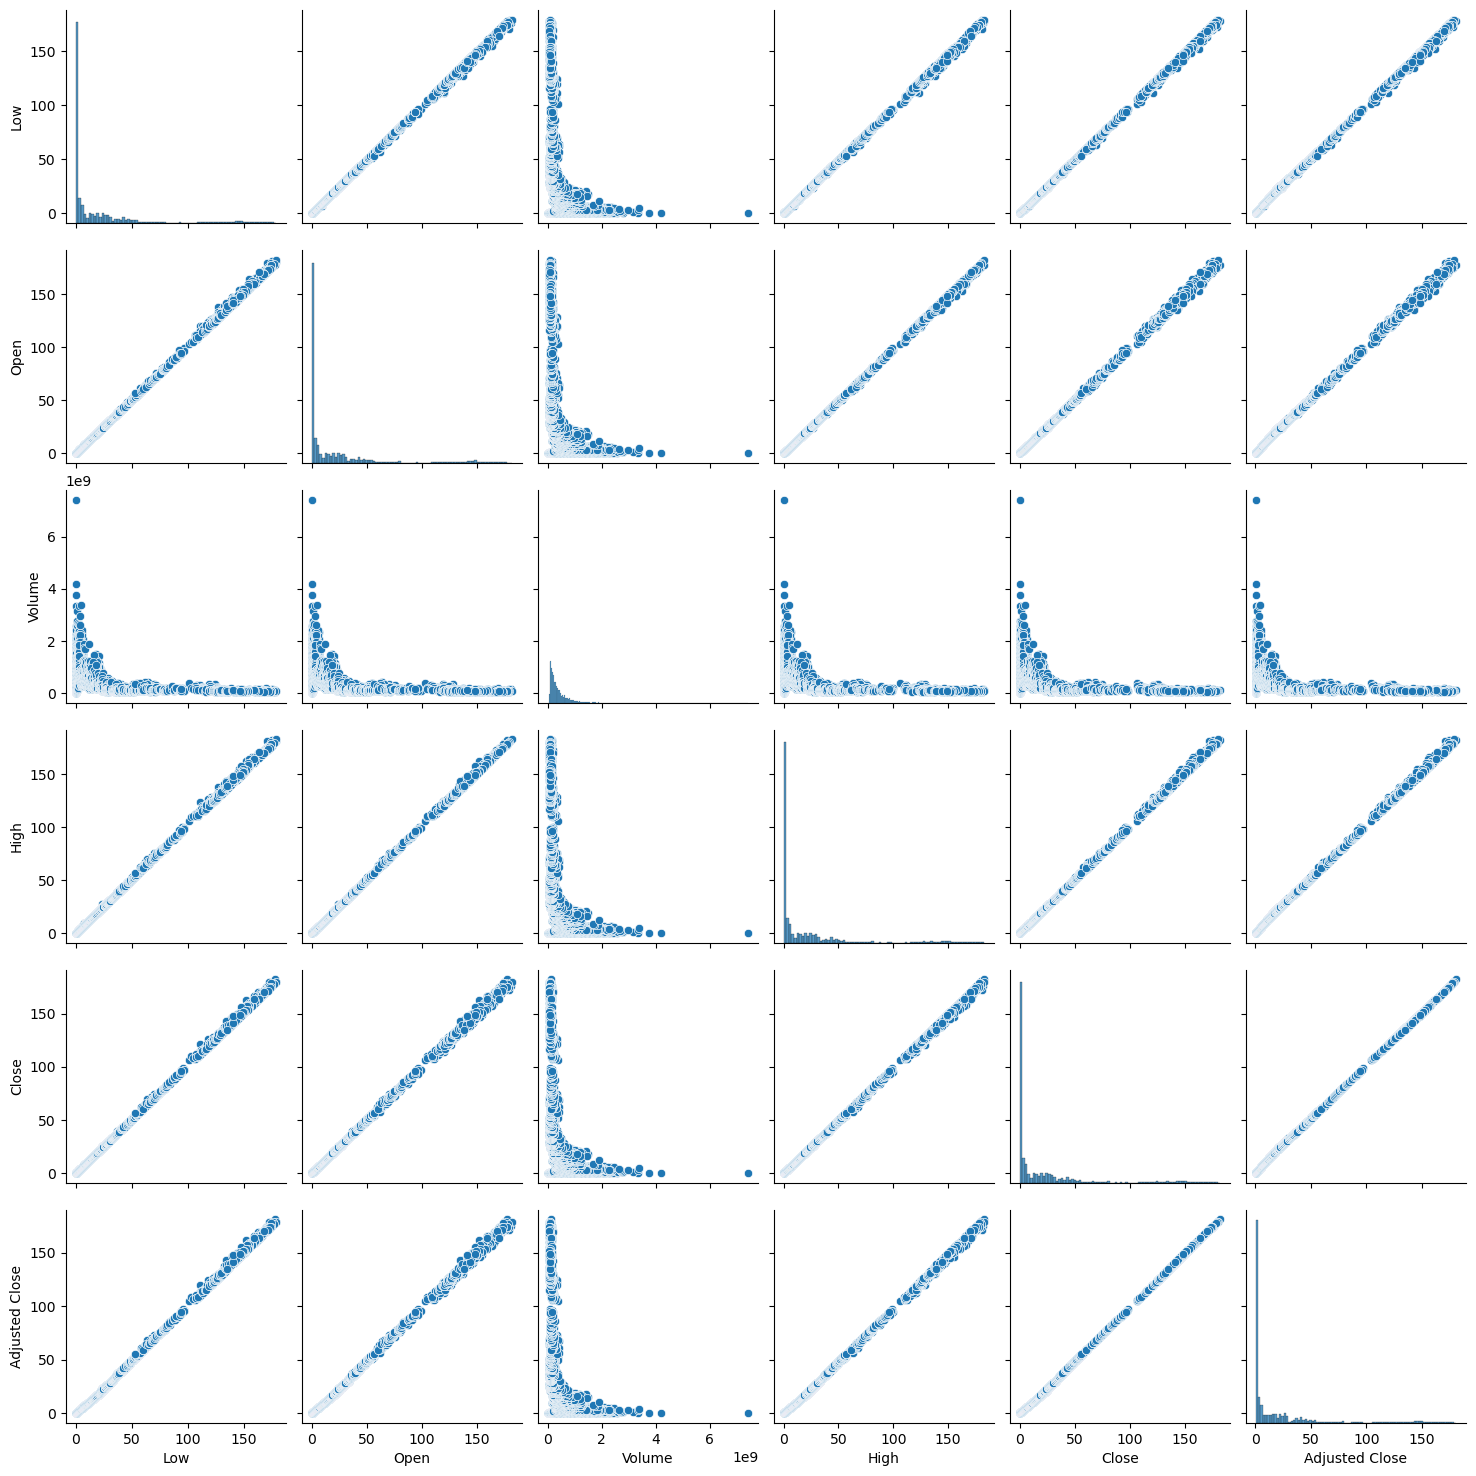

In [31]:
import seaborn as sns
df['Date']=pd.to_datetime(df['Date'])

sns.pairplot(df)
plt.show()

In [32]:
df['Date']=pd.to_datetime(df['Date'])

df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

df=df.drop(columns=['Date'])

scaler=MinMaxScaler(feature_range=(0,1))
df_scaled=scaler.fit_transform(df)

train_size=int(len(df_scaled)*0.8)
test_size=len(df_scaled)-train_size
train,test=df_scaled[0:train_size,:],df_scaled[train_size:len(df_scaled),:]

def create_sequences(data,t,d):
    X,Y=[],[]
    for i in range(len(data)-t-1):
        a=data[i:(i+t),:]
        X.append(a); Y.append(data[i+t,:])
    return np.array(X),np.array(Y)

t=10
d=9
X_train,Y_train=create_sequences(train,t,d)
X_test,Y_test=create_sequences(test,t,d)


In [34]:
# Building Model

model=Sequential()
model.add(LSTM(50,input_shape=(t,d)))
model.add(Dense(d))
model.compile(loss='mean_squared_error', optimizer='adam')

history=model.fit(X_train,Y_train,epochs=50,batch_size=1,verbose=1)

Epoch 1/50
6625/6625 [==============================] - 12s 2ms/step - loss: 0.0069
Epoch 2/50
6625/6625 [==============================] - 10s 2ms/step - loss: 0.0049
Epoch 3/50
6625/6625 [==============================] - 11s 2ms/step - loss: 0.0046
Epoch 4/50
6625/6625 [==============================] - 11s 2ms/step - loss: 0.0042
Epoch 5/50
6625/6625 [==============================] - 10s 2ms/step - loss: 0.0040
Epoch 6/50
6625/6625 [==============================] - 11s 2ms/step - loss: 0.0038
Epoch 7/50
6625/6625 [==============================] - 11s 2ms/step - loss: 0.0037
Epoch 8/50
6625/6625 [==============================] - 11s 2ms/step - loss: 0.0036
Epoch 9/50
6625/6625 [==============================] - 11s 2ms/step - loss: 0.0035
Epoch 10/50
6625/6625 [==============================] - 11s 2ms/step - loss: 0.0034
Epoch 11/50
6625/6625 [==============================] - 11s 2ms/step - loss: 0.0033
Epoch 12/50
6625/6625 [==============================] - 11s 2ms/step - lo

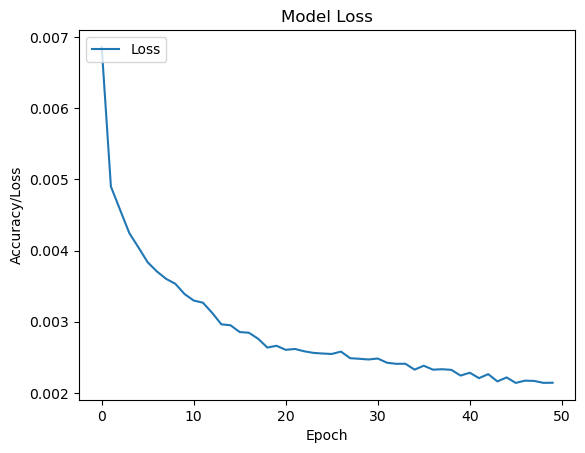

In [35]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['Loss'],loc='upper left')
plt.show()